In [0]:
#Load Packages

In [2]:
!pip install -U -q PyDrive
import numpy as np
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('universal_tagset')
nltk.download('wordnet')
lemmatizer = nltk.WordNetLemmatizer()

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.svm import SVC
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Install Libraries

In [3]:
from itertools import *
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

from nltk.corpus import wordnet

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy.sparse import csr_matrix
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import NearMiss, RandomUnderSampler

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.models import Sequential
from keras.layers.recurrent import LSTM, SimpleRNN, GRU

Using TensorFlow backend.


# Data Pre-Processing

1. Balance Positive and Negative Reviews (Split Equally the Distribution into Positive and Negative Reviews)
Metric: 
1,2 Rating - Negative Review
4,5 Rating - Good Review
Ignore 3 Rating as its Neutral

In [4]:
link='https://drive.google.com/open?id=1Z_y9nw9nQCmuQUJyFUF2DkVw_7KX346b'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('reviews_Baby_5.json')  
df = pd.read_json('reviews_Baby_5.json', orient='columns',lines=True)
# Dataset is now stored in a Pandas Dataframe

df

1Z_y9nw9nQCmuQUJyFUF2DkVw_7KX346b


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,097293751X,"[0, 0]",5,Perfect for new parents. We were able to keep ...,"07 16, 2013",A1HK2FQW6KXQB2,"Amanda Johnsen ""Amanda E. Johnsen""",Awesine,1373932800
1,097293751X,"[0, 0]",5,This book is such a life saver. It has been s...,"06 29, 2013",A19K65VY14D13R,angela,Should be required for all new parents!,1372464000
2,097293751X,"[0, 0]",5,Helps me know exactly how my babies day has go...,"03 19, 2014",A2LL1TGG90977E,Carter,Grandmother watching baby,1395187200
3,097293751X,"[0, 0]",5,I bought this a few times for my older son and...,"08 17, 2013",A5G19RYX8599E,cfpurplerose,repeat buyer,1376697600
4,097293751X,"[0, 0]",4,I wanted an alternative to printing out daily ...,"04 1, 2014",A2496A4EWMLQ7,C. Jeter,Great,1396310400
5,097293751X,"[0, 0]",4,"This is great for basics, but I wish the space...","05 10, 2014",A3OQEVD4C7G3L3,CMB,"Great for basics, but not detail",1399680000
6,097293751X,"[0, 0]",5,My 3 month old son spend half of his days with...,"07 17, 2013",ATZDT4B1U7NL,HYM,Perfect for the working mom,1374019200
7,097293751X,"[3, 3]",5,This book is perfect! I'm a first time new mo...,"01 27, 2013",A3NMPMELAZC8ZY,Jakell,Great for newborns,1359244800
8,097293751X,"[0, 0]",3,"I wanted to love this, but it was pretty expen...","04 22, 2014",A1ZSTU6RKY1JCL,Jen,"It's ok, but I liked a regular weekly planner ...",1398124800
9,097293751X,"[0, 0]",5,The Baby Tracker brand books are the absolute ...,"11 19, 2013",A1TFH58BMFJCR3,killerbee,Best for Tracking!,1384819200


In [5]:
# Remove any 'neutral' ratings equal to 3
df = df[df['overall'] != 3]

# # df = pd.concat(f1)
# df = df.sample(frac=0.7, random_state=0) #uncomment to use full set of data
# # Drop missing values
df.dropna(inplace=True)

# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['overall'] > 3, 1, 0)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Sentiment
0,097293751X,"[0, 0]",5,Perfect for new parents. We were able to keep ...,"07 16, 2013",A1HK2FQW6KXQB2,"Amanda Johnsen ""Amanda E. Johnsen""",Awesine,1373932800,1
1,097293751X,"[0, 0]",5,This book is such a life saver. It has been s...,"06 29, 2013",A19K65VY14D13R,angela,Should be required for all new parents!,1372464000,1
2,097293751X,"[0, 0]",5,Helps me know exactly how my babies day has go...,"03 19, 2014",A2LL1TGG90977E,Carter,Grandmother watching baby,1395187200,1
3,097293751X,"[0, 0]",5,I bought this a few times for my older son and...,"08 17, 2013",A5G19RYX8599E,cfpurplerose,repeat buyer,1376697600,1
4,097293751X,"[0, 0]",4,I wanted an alternative to printing out daily ...,"04 1, 2014",A2496A4EWMLQ7,C. Jeter,Great,1396310400,1


In [0]:
df = df.sort_values(by=['overall'])
# # df = df.head(98000)
dfnegative = df.head(16932)
dfpositive = df.iloc[16933:,:]
dfpositive4 = dfpositive.head(8466)
dfpositive5 = dfpositive.tail(8466)

f = [dfpositive4,dfpositive5]

dfpositives = pd.concat(f)

f1 = [dfnegative,dfpositives]

df = pd.concat(f1)

In [7]:
df[df['overall'] < 3].shape

(16932, 10)

In [8]:
df[df['overall'] > 3].shape

(16932, 10)

The Size of Dataset (33864, 10)
Distribution of Positive and Negative Reviews, Three being the threshold


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc91e942940>]],
      dtype=object)

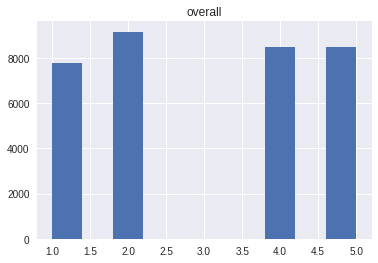

In [9]:
print("The Size of Dataset",df.shape)
print('Distribution of Positive and Negative Reviews, Three being the threshold')
df.hist('overall')

In [0]:
X = df['reviewText']
y = df['Sentiment']

# 2. Pre-Process the Review Text

Stemming, Remove Punctuation, Remove Non-Characters, HTML Tags,Remove Stop Words

In [0]:
def cleanText(raw_text, remove_stopwords=True, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        stops.remove('not')
        stops.remove('no')
        words = [w for w in words if not w in stops]
    if stemming==True: # stemming
        stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [0]:
X_cleaned = []
    
for d in X:
    X_cleaned.append(cleanText(d))

In [13]:
len(X_cleaned)

33864

In [14]:
len(y)

33864

# Vectorizer to get Bag of Words

In [0]:
import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors


# Fit parsed sentences to Word2Vec model 
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

num_features = 300  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index2word)) #4016 
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index2word[0:10])

In [0]:
w2v.wv.most_similar("good")

In [0]:
w2v.wv.vocab


In [0]:
# Transfrom the training data into feature vectors

def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words 
    appeared in that review and in the volcabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the volcabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs
  


In [0]:
# Get feature vectors for training set
X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Get feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)





In [0]:
df.dataFrame(Vector)

In [0]:
countVect = CountVectorizer(min_df = 50, ngram_range = (1,2),strip_accents='unicode', binary=True)


X_all_countVect = countVect.fit_transform(X_cleaned)

X_all_countVect.shape



# countVect = CountVectorizer() 
# X_train_countVect = countVect.fit_transform(X_train_cleaned)
# # X_test_countVect = countVect.fit_transform(X_test_cleaned)

# print("Number of features : %d \n" %len(countVect.get_feature_names())) 
# print("Show some feature names : \n", countVect.get_feature_names()[::1000])


In [0]:
X.shape


(142280,)

In [0]:
pd.DataFrame(Vector)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.069388,-0.013153,0.054835,-0.039095,0.001025,0.017341,-0.010761,-0.057522,-0.025867,0.011124,...,-0.025111,0.013057,-0.013391,0.029543,-0.007357,-0.007933,-0.044569,-0.048843,-0.073326,-0.027087
1,0.065475,-0.006128,0.058317,-0.037643,0.003138,0.021099,-0.018056,-0.050830,-0.019629,0.013732,...,-0.026873,0.020765,-0.013943,0.023775,0.003206,0.005945,-0.049574,-0.040984,-0.058842,-0.029919
2,0.049578,-0.009111,0.053252,-0.038290,0.007098,0.029163,-0.014884,-0.049924,-0.021814,0.013185,...,-0.019547,0.020022,-0.014243,0.018462,-0.008672,-0.005770,-0.054236,-0.037584,-0.065848,-0.028484
3,0.064244,-0.008897,0.055089,-0.038531,-0.000080,0.020658,-0.013328,-0.057210,-0.022098,0.015724,...,-0.022755,0.014518,-0.014286,0.020174,-0.007956,-0.006839,-0.048111,-0.043153,-0.066844,-0.029441
4,0.070233,-0.011254,0.054242,-0.037677,0.002824,0.022041,-0.014334,-0.053283,-0.017982,0.011097,...,-0.024423,0.017525,-0.011410,0.021729,-0.003172,-0.001288,-0.046571,-0.042237,-0.061279,-0.026259
5,0.083888,-0.021353,0.059419,-0.041400,-0.014304,0.021792,-0.016456,-0.061048,-0.011093,0.008894,...,-0.018828,0.010869,-0.006583,0.022745,-0.007514,0.005524,-0.053573,-0.044459,-0.059099,-0.015772
6,0.054859,-0.012571,0.055948,-0.038707,0.001246,0.019404,-0.015212,-0.055475,-0.024909,0.016670,...,-0.031134,0.011544,-0.007469,0.028106,-0.016090,-0.016264,-0.043133,-0.054708,-0.079372,-0.032365
7,0.068426,-0.011477,0.055413,-0.040620,0.001740,0.020979,-0.012399,-0.055227,-0.023061,0.011644,...,-0.020867,0.018230,-0.016579,0.023538,-0.004556,-0.006278,-0.047503,-0.044908,-0.066541,-0.024994
8,0.071679,-0.012348,0.057784,-0.036595,-0.007504,0.022422,-0.017209,-0.049481,-0.017138,0.012129,...,-0.022342,0.022910,-0.013935,0.016716,-0.001266,0.004569,-0.051604,-0.039124,-0.058081,-0.027762
9,0.072149,-0.012791,0.056514,-0.036096,-0.004234,0.019730,-0.016963,-0.053883,-0.018728,0.014582,...,-0.026595,0.016950,-0.012600,0.023211,-0.003185,-0.001015,-0.047528,-0.044669,-0.065897,-0.030022


In [0]:
pd.DataFrame(sentences)


,0,1,2,3,4,5,6,7,8,9,...,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546
0,perfect,new,parents,able,keep,track,baby,feeding,sleep,diaper,...,None,None,None,None,None,None,None,None,None,None
1,book,life,saver,helpful,able,go,back,track,trends,answer,...,None,None,None,None,None,None,None,None,None,None
2,helps,know,exactly,babies,day,gone,mother,law,watching,go,...,None,None,None,None,None,None,None,None,None,None
3,bought,times,older,son,bought,newborn,super,easy,use,helps,...,None,None,None,None,None,None,None,None,None,None
4,wanted,alternative,printing,daily,log,sheets,nanny,fill,worked,great,...,None,None,None,None,None,None,None,None,None,None
5,great,basics,wish,space,write,things,bigger,lot,times,need,...,None,None,None,None,None,None,None,None,None,None
6,month,old,son,spend,half,days,mother,half,neighbor,worked,...,None,None,None,None,None,None,None,None,None,None
7,book,perfect,first,time,new,mom,book,made,easy,keep,...,None,None,None,None,None,None,None,None,None,None
8,baby,tracker,brand,books,absolute,best,trackers,available,track,naps,...,None,None,None,None,None,None,None,None,None,None
9,postpartum,stay,hospital,nurses,ask,keep,log,baby,feedings,urination,...,None,None,None,None,None,None,None,None,None,None


In [0]:
X.shape, y.shape

((142280,), (142280,))

In [0]:
rus = RandomUnderSampler(random_state=777)

X_RUS, y_RUS = rus.fit_sample(Vector, y)

In [0]:


# # Fit and transform the training data to a document-term matrix using TfidfVectorizer 
# tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
# X_train_tfidf = tfidf.fit_transform(X_train)
# print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
# print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

In [0]:
# bag_of_words = tfidf.get_feature_names()
# postag_bag = nltk.pos_tag(bag_of_words,tagset="universal")
# word_tag_fd = nltk.FreqDist(postag_bag)
# words_adj_tfid =[lemmatizer.lemmatize(wt[0]) for (wt, _) in word_tag_fd.most_common() if wt[1] == 'ADJ']

In [0]:
# bag_of_words = countVect.get_feature_names()
# postag_bag = nltk.pos_tag(bag_of_words,tagset="universal")
# word_tag_fd = nltk.FreqDist(postag_bag)
# words_adj_cv =[(wt[0]) for (wt, _) in word_tag_fd.most_common() if wt[1] == 'ADJ']


In [0]:
# X_train.toarray()

In [0]:
# # countVect = CountVectorizer(min_df = 5,strip_accents='unicode', binary=True,  vocabulary=set(words_adj_cv))
# countVect = CountVectorizer(min_df = 15, ngram_range = (1,2),strip_accents='unicode', binary=True)
# # countVect = CountVectorizer(min_df = 5,strip_accents='unicode', binary=True)

# X_train_countVect = countVect.fit_transform(X_train)

# X_test_countVect =  countVect.transform(X_test)

In [0]:
Vector

NameError: ignored

In [0]:
X_RUS

array([[ 0.00817452, -0.0557478 , -0.05526066, ..., -0.01368568,
         0.03842094, -0.00169472],
       [ 0.00470921, -0.07526653, -0.04898947, ...,  0.00269015,
         0.04630072, -0.00235328],
       [ 0.00339982, -0.0567385 , -0.04488197, ..., -0.00600321,
         0.04412786, -0.00054963],
       ...,
       [ 0.00537094, -0.06512371, -0.04997108, ..., -0.01217577,
         0.04494867, -0.00139499],
       [ 0.00548612, -0.06984213, -0.04237217, ..., -0.00539935,
         0.04685415, -0.00018516],
       [ 0.00204039, -0.05913551, -0.05388719, ..., -0.01223835,
         0.04498758,  0.00163648]], dtype=float32)

In [0]:
X_train_countVect1 = X_RUS
y_train1 = y_RUS


In [0]:
X_RUS.shape, y_RUS.shape

((33864, 300), (33864,))

In [0]:
tokenizer = Tokenizer(nb_words=embedding_matrix.shape[0]) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


AttributeError: ignored

In [0]:
top_words = embedding_matrix.shape[0] #4016
maxlen = 100  
batch_size = 32
nb_classes = 2
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) #(27799, 100)
print('X_test shape:', X_test_seq.shape) #(3089, 100)
print('y_train shape:', y_train_seq.shape) #(27799, 2)
print('y_test shape:', y_test_seq.shape) #(3089, 2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


X_train shape: (27091, 100)
X_test shape: (6773, 100)
y_train shape: (27091, 2)
y_test shape: (6773, 2)


In [0]:
y_train_seq

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
X_train_seq[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  143,    9,
        199,  571,   19,  106,  180,    3,  128, 1901,   10,  273,  447,
        222,    2,  108,  384, 4988,    9,    1,   95,  113,    2,    6,
        565,   75,   10,   49,  553,  150,  553,  268,   28,    1, 2984,
         47, 1455, 3471,   66, 5848,   62,   19,   51,    5,   46,  169,
         77], dtype=int32)

In [0]:
sequences_train[0]

[143,
 9,
 199,
 571,
 19,
 106,
 180,
 3,
 128,
 1901,
 10,
 273,
 447,
 222,
 2,
 108,
 384,
 4988,
 9,
 1,
 95,
 113,
 2,
 6,
 565,
 75,
 10,
 49,
 553,
 150,
 553,
 268,
 28,
 1,
 2984,
 47,
 1455,
 3471,
 66,
 5848,
 62,
 19,
 51,
 5,
 46,
 169,
 77]

In [0]:
print(X_train_seq)

[[   0    0    0 ...   46  169   77]
 [   6  553 1144 ...    9   24   36]
 [   0    0    0 ...   15    8  832]
 ...
 [   0    0    0 ...   37  911  604]
 [   0    0    0 ...   45  405  213]
 [   0    0    0 ...   26   20  582]]


# GLOVE


In [0]:
import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors


In [0]:
# Split review text into parsed sentences uisng NLTK's punkt tokenizer
# nltk.download()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences



In [0]:
X_cleaned=np.array(X_cleaned)
y=np.array(y)

In [0]:
!pip install -q glove_python

In [0]:
#importing the glove library
from glove import Corpus, Glove


In [0]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, np.array(model.word_vectors[model.dictionary[word]]).reshape(1,300), axis=0)
    
    # gets list of most similar words
    close_words = model.most_similar(word)
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = np.array(model.word_vectors[model.dictionary[wrd_score[0]]]).reshape(1,300)
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = np.array(model.word_vectors[model.dictionary[wrd]]).reshape(1,300)
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)



#   y_train = np_utils.to_categorical(y_train,2)
#   y_test = np_utils.to_categorical(y_test,2)
#   svm_mean = svc_classifier(X_train_countVect,y_train,X_tes,y_test,target_names)
#   svm.append(svc_mean)
  
  
  # Split review text into parsed sentences uisng NLTK's punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


# Parse each review in the training set into sentences
sentences = []
for review in X_cleaned:
  sentences += parseSent(review, tokenizer)

 

In [0]:
# creating a corpus object
  corpus = Corpus() 
  #training the corpus to generate the co occurence matrix which is used in GloVe
  corpus.fit(sentences, window=10)
  #creating a Glove object which will use the matrix created in the above lines to create embeddings
  #We can set the learning rate as it uses Gradient Descent and number of components
  glove = Glove(no_components=300, learning_rate=0.05)
 
  glove.fit(corpus.matrix, epochs=3, no_threads=4, verbose=True)
  glove.add_dictionary(corpus.dictionary)
  glove.save('glove.model')

Performing 3 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2


In [0]:
w2v = glove.load("glove.model")



In [0]:
np.array(w2v.word_vectors[w2v.dictionary['perfect']]).reshape(1,300)

array([[ 0.08316716,  0.07627835, -0.07753995, -0.06460779, -0.05446008,
        -0.0542144 ,  0.07077959,  0.07550431, -0.09555361,  0.08816677,
         0.04671147, -0.02106752,  0.11272807, -0.06513903,  0.00454743,
         0.07219519,  0.03189804,  0.07544784, -0.10255741,  0.11063116,
         0.02246153,  0.10275869, -0.05702292,  0.09674582, -0.05922763,
         0.03831468,  0.00061195, -0.01918037,  0.09918206,  0.03537629,
        -0.00207278,  0.09958328, -0.09042219,  0.0281967 ,  0.00826505,
         0.01692196,  0.07166946,  0.02382675,  0.0484121 , -0.01655493,
         0.07597241, -0.0597597 ,  0.09664009, -0.07167452,  0.1394197 ,
        -0.00736326,  0.01672936,  0.09599266,  0.07176645, -0.0228228 ,
        -0.00141288,  0.03782059, -0.11790616,  0.09864123,  0.10076909,
        -0.04992766, -0.09243863,  0.09089936,  0.02003419, -0.03014943,
         0.11702663,  0.02513716, -0.17431425, -0.01285411, -0.03736125,
        -0.07269619, -0.1240666 ,  0.05837666, -0.0

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

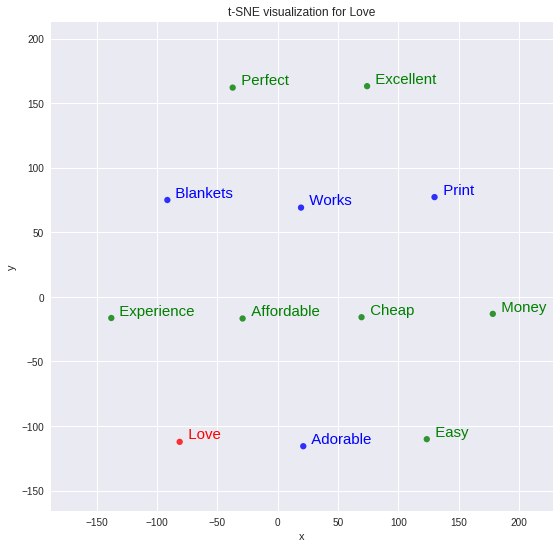

In [0]:
tsnescatterplot(w2v, 'love', ['money', 'excellent', 'cheap', 'perfect', 'easy', 'affordable', 'experience'])

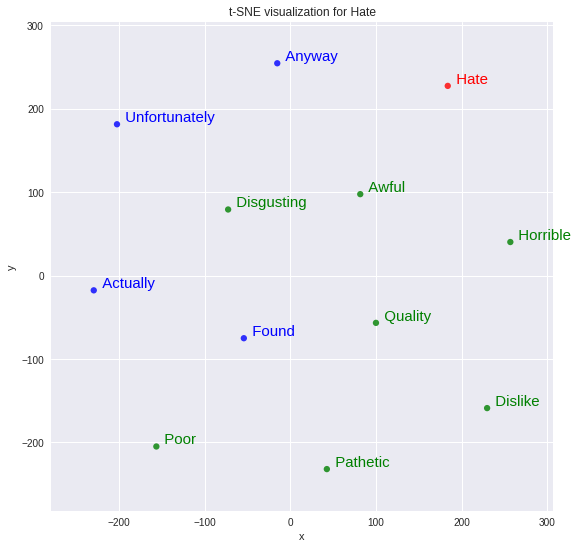

In [0]:
tsnescatterplot(w2v, 'hate', ['horrible','dislike','pathetic','poor','quality','disgusting','awful'])

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.inverse_dictionary:
        tokens.append(model.word_vectors[word])
        labels.append(w2v.inverse_dictionary[word])
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=300, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

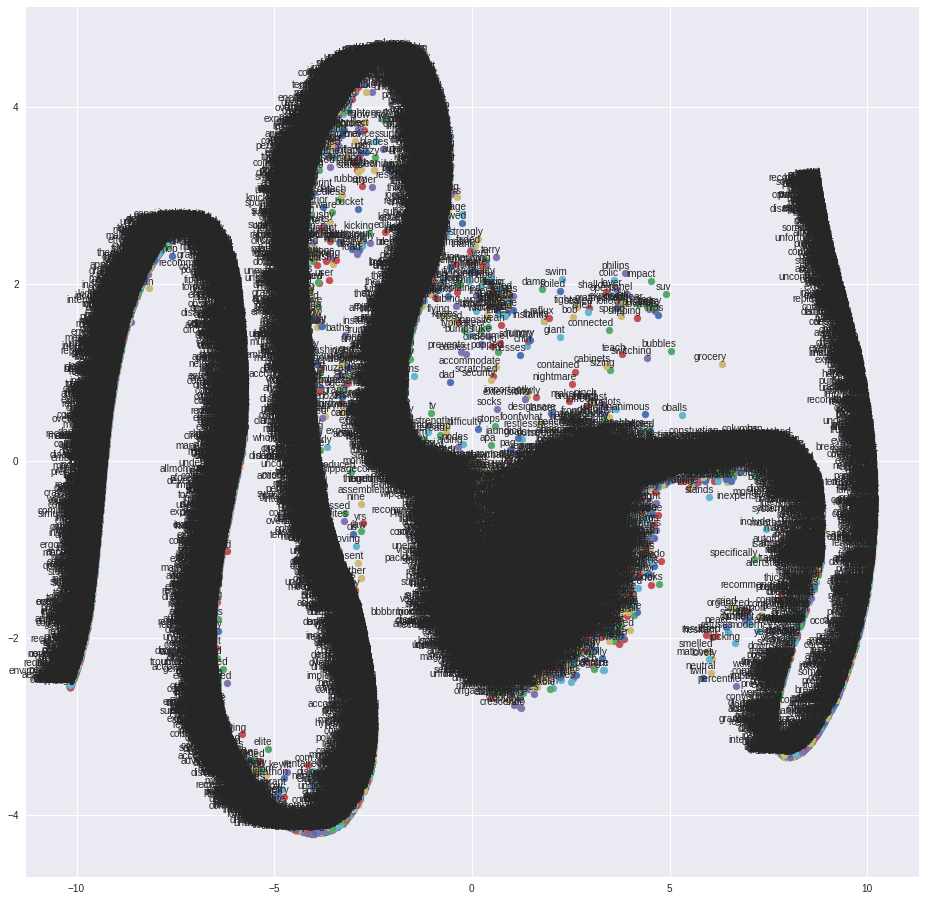

In [0]:
tsne_plot(w2v)

In [0]:

knn = []
svm = []
dt =[]
nb =[]
lr =[]
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


maxlen = 100
batch_size = 64
nb_classes = 2
nb_epoch = 3


num_features = 300  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 



for train_index, test_index in skf.split(X_cleaned,y):
  X_train = X_cleaned[train_index]
  y_train = y[train_index]
  X_test = X_cleaned[test_index]
  y_test = y[test_index]
#   y_train = np_utils.to_categorical(y_train,2)
#   y_test = np_utils.to_categorical(y_test,2)
#   svm_mean = svc_classifier(X_train_countVect,y_train,X_tes,y_test,target_names)
#   svm.append(svc_mean)
  
  
  # Split review text into parsed sentences uisng NLTK's punkt tokenizer
  tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


  # Parse each review in the training set into sentences
  sentences = []
  for review in X_train:
    sentences += parseSent(review, tokenizer)
    
 
  # Fit parsed sentences to Word2Vec model 
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)



  print("Training Word2Vec model ...\n")
  # creating a corpus object
  corpus = Corpus() 
  #training the corpus to generate the co occurence matrix which is used in GloVe
  corpus.fit(sentences, window=10)
  #creating a Glove object which will use the matrix created in the above lines to create embeddings
  #We can set the learning rate as it uses Gradient Descent and number of components
  glove = Glove(no_components=300, learning_rate=0.05)
 
  glove.fit(corpus.matrix, epochs=5, no_threads=4, verbose=True)
  glove.add_dictionary(corpus.dictionary)
  glove.save('glove.model')
  w2v = glove.load("glove.model")


#   # Get Word2Vec embedding matrix
  embedding_matrix = w2v.word_vectors  # embedding matrix, type = numpy.ndarray 
  top_words = w2v.word_vectors.shape[0] #4016

    
#   # Vectorize X_train and X_test to 2D tensor
  
  tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
  tokenizer.fit_on_texts(X_train)
  tokenizer.word_index #access word-to-index dictionary of trained tokenizer

  sequences_train = tokenizer.texts_to_sequences(X_train)
  sequences_test = tokenizer.texts_to_sequences(X_test)

  X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
  X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


   # one-hot encoding of y_train and y_test
  y_train_seq = np_utils.to_categorical(y_train, nb_classes)
  y_test_seq = np_utils.to_categorical(y_test, nb_classes)

  print('X_train shape:', X_train_seq.shape) #(27799, 100)
  print('X_test shape:', X_test_seq.shape) #(3089, 100)
  print('y_train shape:', y_train_seq.shape) #(27799, 2)
  print('y_test shape:', y_test_seq.shape) #(3089, 2)

  # Construct Word2Vec embedding layer
  embedding_layer = Embedding(embedding_matrix.shape[0], #4016
                            embedding_matrix.shape[1], #300
                            weights=[embedding_matrix])
  # Construct LSTM with Word2Vec embedding
  model2 = Sequential()
  model2.add(embedding_layer)
  model2.add(LSTM(200, dropout_W=0.25, dropout_U=0.25))
  model2.add(Dense(nb_classes))
  model2.add(Activation('relu'))
  model2.summary()

  # Compile model
  model2.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])




  model2.fit(X_train_seq, y_train_seq, batch_size=batch_size, nb_epoch=3, verbose=1)


  # Model evaluation
  score = model2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
  nb.append(score)
  print('Test accuracy : {:.4f}'.format(score[1]))

  print('Test loss : {:.4f}'.format(score[0]))
#   print('The Accuracy for KNN:',sum(knn)/len(knn))
#   print('The Accuracy for SVM:',sum(svm)/len(svm))
#   print('The Accuracy for DT:',sum(dt)/len(dt))
#   print('The Accuracy for MNB:',sum(nb)/len(nb))
#   print('The Accuracy for LR:',sum(lr)/len(lr))

Training Word2Vec model ...

Performing 5 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


X_train shape: (27090, 1000)
X_test shape: (6774, 1000)
y_train shape: (27090, 2)
y_test shape: (6774, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:99: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(200, dropout=0.25, recurrent_dropout=0.25)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 300)         7922400   
_________________________________________________________________
lstm_5 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 402       
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total params: 8,323,602
Trainable params: 8,323,602
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/3
27090/27090 [==============================] - 2508s 93ms/step - loss: 0.7462 - acc: 0.6973
Epoch 2/3
17536/27090 [==================>...........] - ETA: 14:48 - loss: 7.6104 - acc: 0.5212

KeyboardInterrupt: ignored

In [0]:
y

26377     0
155734    0
47041     0
71130     0
86211     0
71131     0
86206     0
155736    0
47053     0
148927    0
130895    0
86189     0
141275    0
130894    0
18894     0
47064     0
55034     0
115004    0
30417     0
8049      0
18937     0
36343     0
115012    0
115009    0
105162    0
36339     0
30411     0
86258     0
115006    0
86251     0
         ..
65953     1
65954     1
65955     1
65956     1
65996     1
65995     1
65994     1
65993     1
65991     1
65990     1
65989     1
65988     1
65987     1
65986     1
65985     1
65998     1
65984     1
65980     1
65972     1
65970     1
65969     1
65968     1
65967     1
65966     1
65964     1
65963     1
65958     1
65957     1
65981     1
160791    1
Name: Sentiment, Length: 33864, dtype: int64

In [0]:
y_train.shape

(21672, 2, 2)

#Classifier

# **K-Nearest Neighbours**

In [0]:
  
#   #KNN
#   X_test_countVect = tfidf.transform(X_test_cleaned)
#   X_train_countVect = X_train_tfidf
 
def knn_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names): 
    classifier=KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train_countVect,y_train)

    y_pred=classifier.predict(X_test_countVect)

    y_pred_train = classifier.predict(X_train_countVect)
    print('KNN Results:')
    print("KNN Accuracy:",metrics.accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
    print("KNN Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
    print(classification_report(y_train, y_pred_train, target_names=target_names))
    
    return metrics.accuracy_score(y_test,y_pred)


# SVM

In [0]:
#SVM
def svc_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names): 
  from sklearn import svm
  clf=svm.SVC(kernel='linear')
  clf.fit(X_train_countVect,y_train)

  y_pred=clf.predict(X_test_countVect)
  
  y_pred_train =clf.predict(X_train_countVect)

# scores = cross_val_score(clf, iris.data, iris.target, cv=5)
# print("scores",scores.avg)
  print('SVM Results:')
  print("SVM Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("SVM Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  print(classification_report(y_train, y_pred_train, target_names=target_names))

  return metrics.accuracy_score(y_test,y_pred)
  
  

# MultiNomial NB

In [0]:
# Naive Bayes classifier
def nb_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names): 

  clf = MultinomialNB()
  clf.fit(X_train_countVect.toarray(),y_train)

  y_pred=clf.predict(X_test_countVect)

  y_pred_train =clf.predict(X_train_countVect)
  print('NB Results:')
#   y_pred_train =clf.predict(countVect.transform(X_test_cleaned))
  print("MNB Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("MNB Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  print(classification_report(y_train, y_pred_train, target_names=target_names))

  return metrics.accuracy_score(y_test,y_pred)
  




# Logistic Regression

In [0]:
# Logistic Regression
def lr_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names): 
  lr = LogisticRegression()
  lr.fit(X_train_countVect.toarray(), y_train)


  y_pred=lr.predict(X_test_countVect)

  y_pred_train =lr.predict(X_train_countVect)
  print('LR Results:')
  #   y_pred_train =clf.predict(countVect.transform(X_test_cleaned))
  print("LR Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("LR Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  print(classification_report(y_train, y_pred_train, target_names=target_names))
  
  return metrics.accuracy_score(y_test,y_pred)




# Adaboosting (Decision Trees)

In [0]:
# #   Decision Trees
def dt_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names): 
  clf = AdaBoostClassifier(n_estimators=400,learning_rate=1)
  clf.fit(X_train_countVect,y_train)
  
  y_pred=clf.predict(X_test_countVect)
  
  y_pred_train =clf.predict(X_train_countVect)


  print('Adaboosting Results:')
  print("Adaboosting DT Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("Adaboosting DT Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  print(classification_report(y_train, y_pred_train, target_names=target_names))
  
  return metrics.accuracy_score(y_test,y_pred)

# Random Forest (Decision Trees) (On-Hold)

In [0]:
w2v.dictionary

#LSTM with word2vec


In [0]:
import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

# Load trained Word2Vec model
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")


# Get Word2Vec embedding matrix
embedding_matrix = w2v.wv.syn0  # embedding matrix, type = numpy.ndarray 
print("Shape of embedding matrix : ", embedding_matrix.shape) #(4016, 300) = (volcabulary size, embedding dimension)
# w2v.wv.syn0[0] #feature vector of the first word in the volcabulary list


Shape of embedding matrix :  (13501, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  # This is added back by InteractiveShellApp.init_path()


In [0]:
top_words = embedding_matrix.shape[0] #4016
maxlen = 100  
batch_size = 32
nb_classes = 2
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) #(27799, 100)
print('X_test shape:', X_test_seq.shape) #(3089, 100)
print('y_train shape:', y_train_seq.shape) #(27799, 2)
print('y_test shape:', y_test_seq.shape) #(3089, 2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


NameError: ignored

In [0]:

# Construct Word2Vec embedding layer
embedding_layer = Embedding(embedding_matrix.shape[0], #4016
                            embedding_matrix.shape[1], #300
                            weights=[embedding_matrix])


# Construct LSTM with Word2Vec embedding
model2 = Sequential()
model2.add(embedding_layer)
model2.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

# Compile model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X_train_seq, y_train_seq, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)


# Model evaluation
score = model2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 300)         4050300   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 4,270,206
Trainable params: 4,270,206
Non-trainable params: 0
_________________________________________________________________


NameError: ignored

# Data Visualization

#Words Frequency

# WordCloud

In [0]:
#Most Commonly Used Words in Negative Reviews
#Most Commonly Used Words in Positive Reviews

def create_word_cloud(sentiment):
    try: 
#         df_brand = df.loc[df['Brand Name'].isin([brand])]
        df_brand_sample = df.sample(frac=0.1)
        word_cloud_collection = ''
        
        if sentiment == 1:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==1]["reviewText"]
            
        if sentiment == 0:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==0]["reviewText"]
            
        for val in df_reviews.str.lower():
            tokens = nltk.word_tokenize(val)
            tokens = [word for word in tokens if word not in stopwords.words('english')]
            for words in tokens:
                word_cloud_collection = word_cloud_collection + words + ' '

        wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
        plt.figure(figsize=(20,20))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except: 
        pass

In [0]:
bag_of_words = countVect.get_feature_names()
postag_bag = nltk.pos_tag(bag_of_words,tagset="universal")
word_tag_fd = nltk.FreqDist(postag_bag)
words_adj_cv =[(wt[0]) for (wt, _) in word_tag_fd.most_common() if wt[1] == 'ADJ']


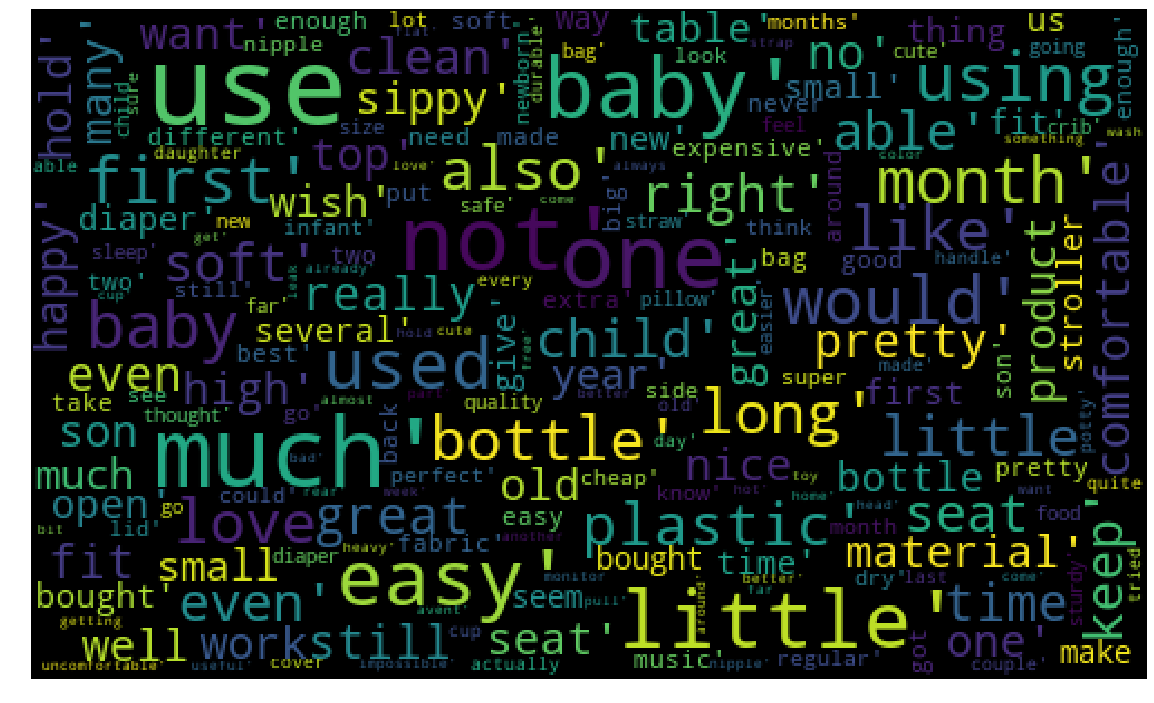

In [0]:
# wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(str(countVect.get_feature_names()))
wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(str(words_adj_cv))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

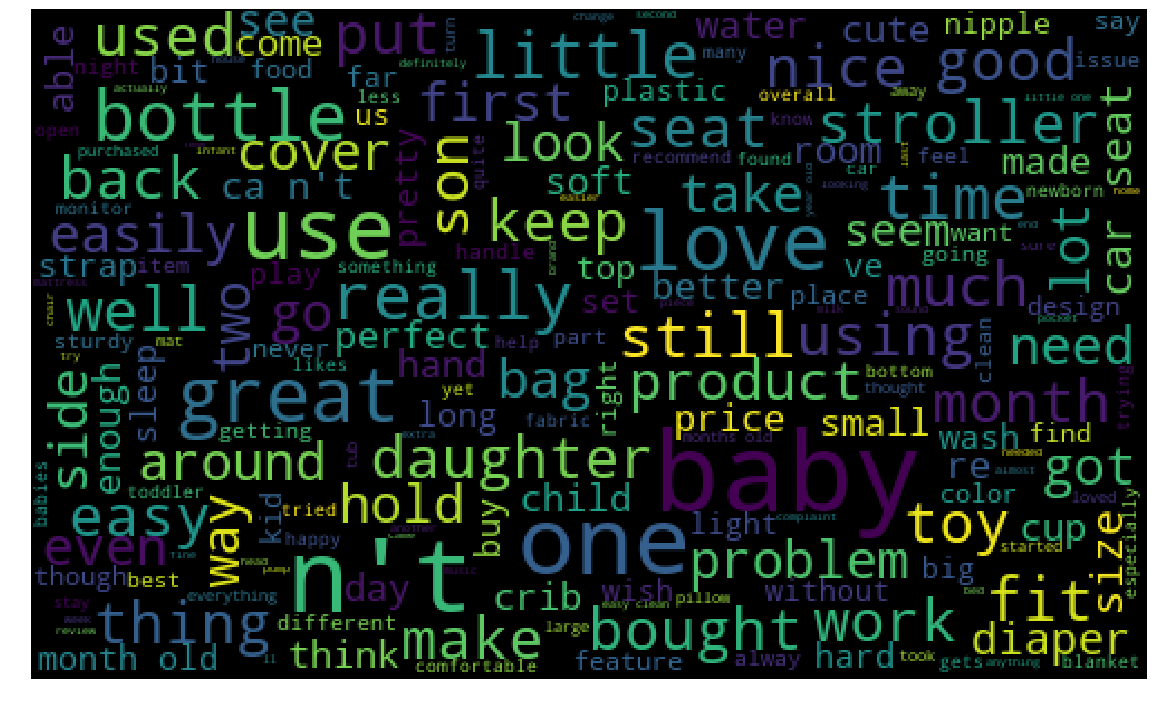

In [0]:
create_word_cloud(1)

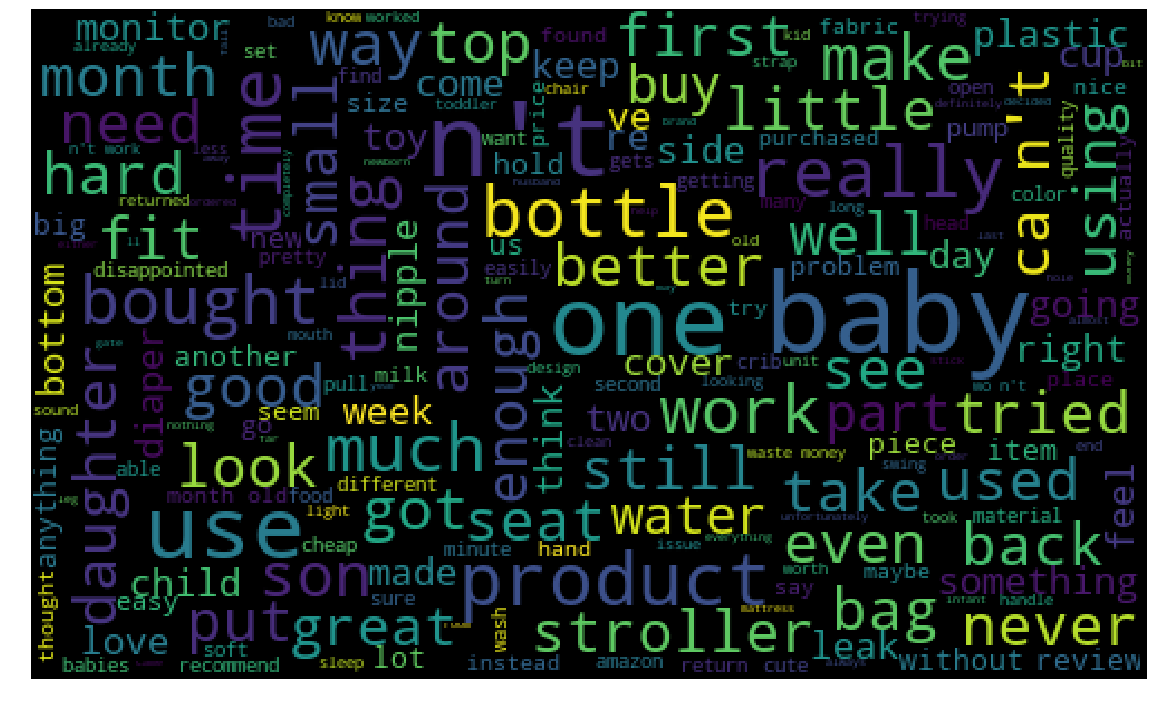

In [0]:
create_word_cloud(0)